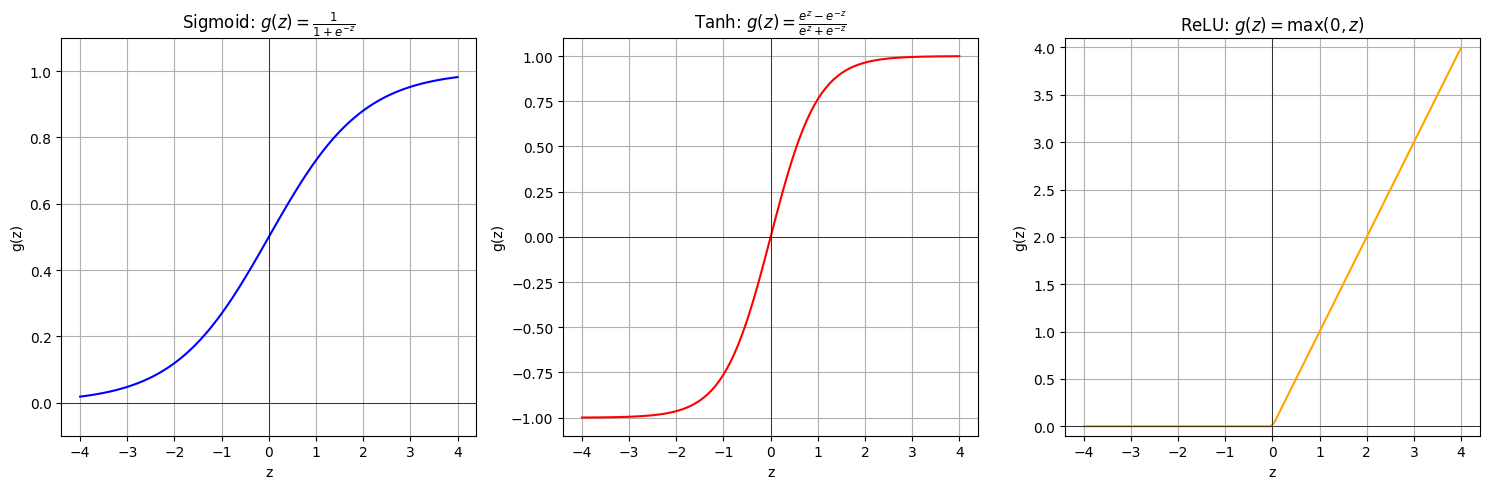

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi aktivasi Sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Fungsi aktivasi Tanh
def tanh(z):
    return np.tanh(z)

# Fungsi aktivasi ReLU
def relu(z):
    return np.maximum(0, z)

# Rentang nilai z
z = np.linspace(-4, 4, 100)

# Menghitung nilai fungsi aktivasi
sigmoid_values = sigmoid(z)
tanh_values = tanh(z)
relu_values = relu(z)

# Membuat plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Sigmoid
axes[0].plot(z, sigmoid_values, color='blue')
axes[0].set_title("Sigmoid: $g(z) = \\frac{1}{1+e^{-z}}$")
axes[0].grid(True)
axes[0].set_ylim([-0.1, 1.1])
axes[0].axhline(0, color='black', lw=0.5)
axes[0].axvline(0, color='black', lw=0.5)

# Plot Tanh
axes[1].plot(z, tanh_values, color='red')
axes[1].set_title("Tanh: $g(z) = \\frac{e^z - e^{-z}}{e^z + e^{-z}}$")
axes[1].grid(True)
axes[1].set_ylim([-1.1, 1.1])
axes[1].axhline(0, color='black', lw=0.5)
axes[1].axvline(0, color='black', lw=0.5)

# Plot ReLU
axes[2].plot(z, relu_values, color='orange')
axes[2].set_title("ReLU: $g(z) = \\max(0, z)$")
axes[2].grid(True)
axes[2].set_ylim([-0.1, 4.1])
axes[2].axhline(0, color='black', lw=0.5)
axes[2].axvline(0, color='black', lw=0.5)

# Menambahkan label
for ax in axes:
    ax.set_xlabel("z")
    ax.set_ylabel("g(z)")

# Menampilkan plot
plt.tight_layout()
plt.show()


In [1]:
from graphviz import Digraph

# Membuat objek Digraph
lstm_diagram = Digraph('LSTM_Architecture', engine='dot', format='png')

# Tambahkan node untuk input
lstm_diagram.node('x_t', 'x_t', shape='ellipse', style='filled', color='lightgreen')
lstm_diagram.node('h_t-1', 'h_{t-1}', shape='ellipse', style='filled', color='lightblue')
lstm_diagram.node('c_t-1', 'c_{t-1}', shape='ellipse', style='filled', color='firebrick1')

# Tambahkan node untuk sigmoid, tanh, dan operasi lainnya
lstm_diagram.node('forget_gate', 'Sigmoid', shape='box', style='filled', color='lemonchiffon')
lstm_diagram.node('input_gate', 'Sigmoid', shape='box', style='filled', color='lemonchiffon')
lstm_diagram.node('cell_gate', 'tanh', shape='box', style='filled', color='lightpink')
lstm_diagram.node('output_gate', 'Sigmoid', shape='box', style='filled', color='lemonchiffon')

lstm_diagram.node('c_t', 'c_t', shape='ellipse', style='filled', color='firebrick1')
lstm_diagram.node('tanh_c', 'tanh', shape='box', style='filled', color='lightpink')
lstm_diagram.node('h_t', 'h_t', shape='ellipse', style='filled', color='lightblue')

# Tambahkan node untuk operasi tambah dan kali
lstm_diagram.node('plus1', '+', shape='circle')
lstm_diagram.node('plus2', '+', shape='circle')
lstm_diagram.node('times1', '×', shape='circle')
lstm_diagram.node('times2', '×', shape='circle')
lstm_diagram.node('times3', '×', shape='circle')

# Menghubungkan input ke gerbang
lstm_diagram.edge('x_t', 'forget_gate', label='w_f')
lstm_diagram.edge('h_t-1', 'forget_gate', label='U_f')
lstm_diagram.edge('x_t', 'input_gate', label='w_i')
lstm_diagram.edge('h_t-1', 'input_gate', label='U_i')
lstm_diagram.edge('x_t', 'cell_gate', label='w_g')
lstm_diagram.edge('h_t-1', 'cell_gate', label='U_g')
lstm_diagram.edge('x_t', 'output_gate', label='w_o')
lstm_diagram.edge('h_t-1', 'output_gate', label='U_o')

# Hubungan antar operasi
lstm_diagram.edge('forget_gate', 'times1')
lstm_diagram.edge('c_t-1', 'times1')
lstm_diagram.edge('input_gate', 'times2')
lstm_diagram.edge('cell_gate', 'times2')

lstm_diagram.edge('times1', 'plus1')
lstm_diagram.edge('times2', 'plus1')
lstm_diagram.edge('plus1', 'c_t')

lstm_diagram.edge('c_t', 'tanh_c')
lstm_diagram.edge('tanh_c', 'times3')
lstm_diagram.edge('output_gate', 'times3')

lstm_diagram.edge('times3', 'h_t')

# Output
lstm_diagram.node('y_t', 'ŷ_t', shape='ellipse', style='filled', color='lightblue')
lstm_diagram.edge('h_t', 'y_t')

# Menyimpan diagram ke file
lstm_diagram.render('lstm_diagram_adjusted', cleanup=True)

print("Diagram berhasil dibuat! Lihat file 'lstm_diagram_adjusted.png'.")

Diagram berhasil dibuat! Lihat file 'lstm_diagram_adjusted.png'.


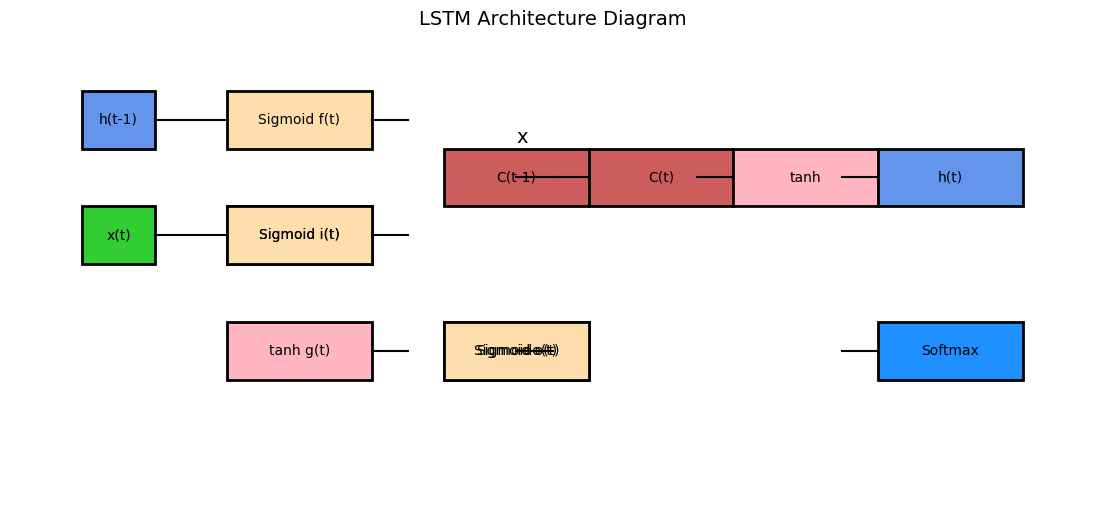

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines

def draw_lstm_architecture():
    fig, ax = plt.subplots(figsize=(14, 6))

    # Fungsi pembantu untuk menggambar blok persegi panjang
    def draw_block(x, y, width, height, text, color, edge_color='black'):
        rect = patches.Rectangle((x, y), width, height, facecolor=color, edgecolor=edge_color, linewidth=2)
        ax.add_patch(rect)
        ax.text(x + width / 2, y + height / 2, text, 
                fontsize=10, ha='center', va='center', color='black')

    # Gambar komponen input
    draw_block(-2, 3, 1, 1, 'h(t-1)', '#6495ED')
    draw_block(-2, 1, 1, 1, 'x(t)', '#32CD32')

    # Garis dari input ke blok sigmoid dan tanh
    ax.add_line(lines.Line2D([-1, 0], [3.5, 3.5], color='black', linewidth=1.5))
    ax.add_line(lines.Line2D([-1, 0], [1.5, 1.5], color='black', linewidth=1.5))

    # Forget Gate
    draw_block(0, 3, 2, 1, 'Sigmoid f(t)', '#FFDEAD')
    ax.add_line(lines.Line2D([2, 2.5], [3.5, 3.5], color='black', linewidth=1.5))

    # Input Gate
    draw_block(0, 1, 2, 1, 'Sigmoid i(t)', '#FFDEAD')
    draw_block(0, 1, 2, 1, 'Sigmoid i(t)', '#FFDEAD')
    draw_block(0, -1, 2, 1, 'tanh g(t)', '#FFB6C1')
    # Garis dari input gate ke g(t) dan i(t)
    ax.add_line(lines.Line2D([2, 2.5], [1.5, 1.5], color='black', linewidth=1.5))
    ax.add_line(lines.Line2D([2, 2.5], [-0.5, -0.5], color='black', linewidth=1.5))

    # Cell State
    draw_block(3, 2, 2, 1, 'C(t-1)', '#CD5C5C')
    ax.add_line(lines.Line2D([4, 4.5], [2.5, 2.5], color='black', linewidth=1.5))

    ax.text(4, 3.1, 'x', fontsize=14, color='black')

    ax.add_line(lines.Line2D([4.5, 5], [2.5, 2.5], color='black', linewidth=1.5))
    draw_block(5, 2, 2, 1, 'C(t)', '#CD5C5C')

    # Output Gate
    draw_block(3, -1, 2, 1, 'Sigmoido(t)', '#FFDEAD')
    ax.add_line(lines.Line2D([4, 4.5], [-0.5, -0.5], color='black', linewidth=1.5))
    draw_block(3, -1, 2, 1, 'Sigmoid o(t)', '#FFDEAD')
    draw_block(7, 2, 2, 1, 'tanh', '#FFB6C1')
    ax.add_line(lines.Line2D([6.5, 7], [2.5, 2.5], color='black', linewidth=1.5))

    # Final Output
    draw_block(9, 2, 2, 1, 'h(t)', '#6495ED')
    ax.add_line(lines.Line2D([8.5, 9], [2.5, 2.5], color='black', linewidth=1.5))

    # Output Softmax
    draw_block(9, -1, 2, 1, 'Softmax', '#1E90FF')
    ax.add_line(lines.Line2D([8.5, 9], [-0.5, -0.5], color='black', linewidth=1.5))

    # Set batas plot
    ax.set_xlim(-3, 12)
    ax.set_ylim(-3, 5)
    ax.axis('off')
    plt.title('LSTM Architecture Diagram', fontsize=14)
    plt.show()

# Jalankan fungsi
draw_lstm_architecture()